In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Read the dataset
df = pd.read_csv('dataset/epa-sea-level.csv')

# Display first few rows to inspect
df.head()


,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


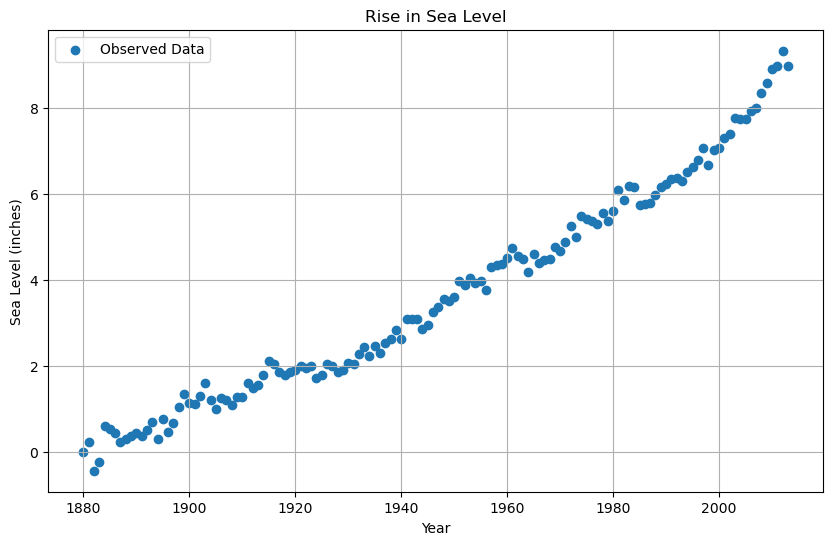

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='Observed Data')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()
plt.grid(True)
plt.show()


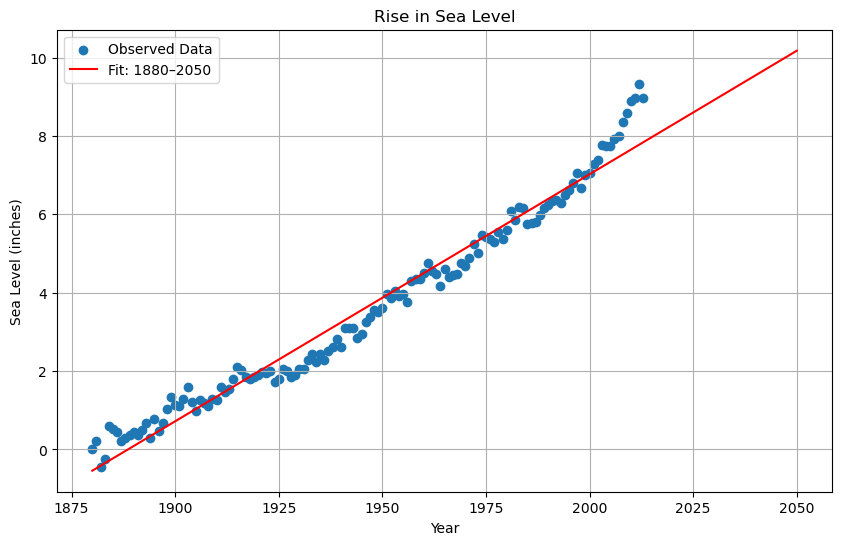

In [3]:
# Linear regression on all data
res_all = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

# Predict years 1880 to 2050
years_all = pd.Series(range(1880, 2051))
sea_levels_all = res_all.slope * years_all + res_all.intercept

# Plot scatter + regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='Observed Data')
plt.plot(years_all, sea_levels_all, 'r', label='Fit: 1880–2050')

plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()
plt.grid(True)
plt.show()


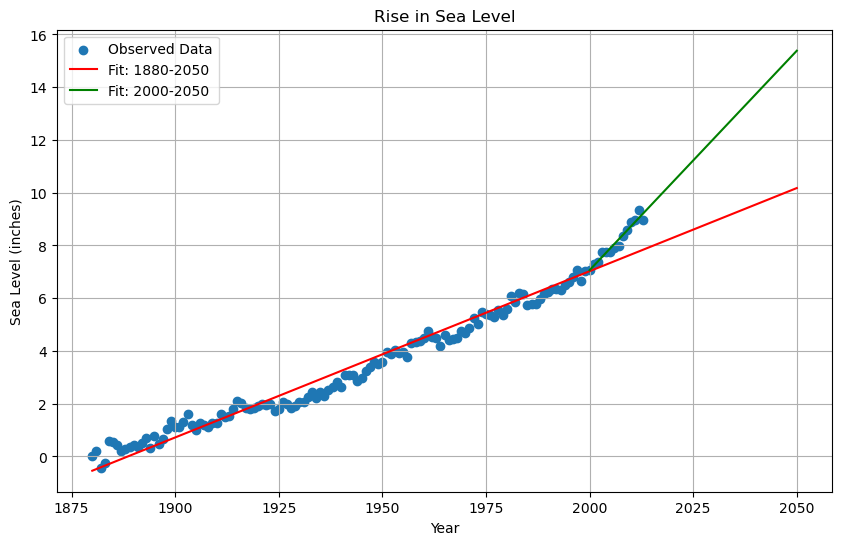

In [4]:
# Filter recent data (year >= 2000)
df_recent = df[df['Year'] >= 2000]

# Linear regression on recent data
res_recent = linregress(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])

# Predict years 2000 to 2050
years_recent = pd.Series(range(2000, 2051))
sea_levels_recent = res_recent.slope * years_recent + res_recent.intercept

# Plot scatter + full regression + recent regression lines
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='Observed Data')
plt.plot(years_all, sea_levels_all, 'r', label='Fit: 1880-2050')
plt.plot(years_recent, sea_levels_recent, 'g', label='Fit: 2000-2050')

plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
print("Predicted sea level in 2050 (all data):", res_all.slope * 2050 + res_all.intercept)
print("Predicted sea level in 2050 (from 2000):", res_recent.slope * 2050 + res_recent.intercept)


Predicted sea level in 2050 (all data): 10.175455257136548
Predicted sea level in 2050 (from 2000): 15.382443524364874
